In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [2]:
### set path
fdiry = file.path(FD_RES, "results", "KS91_K562_ASTARRseq", "coverage", "track_normalized")
fname = "KS91_K562_ASTARRseq.pLog2FC.mean.SUBSET.unstranded.bed.gz"
fpath = file.path(fdiry, fname)

### read data
cnames = c("Chrom", "Start", "End", "Input", "Output", "pLog2FC")
ctypes = cols(
    "Chrom"   = col_character(),
    "Start"   = col_integer(),
    "End"     = col_integer(),
    "Input"   = col_double(), 
    "Output"  = col_double(),
    "pLog2FC" = col_double()
)
dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)

### assign and show
dat_track_log2fc_astarr = dat
print(dim(dat))
head(dat)

[1] 49077000        6


Chrom,Start,End,Input,Output,pLog2FC
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chr11,4000000,4000001,0.128361,0.217619,0.109834
chr11,4000001,4000002,0.124456,0.217619,0.114836
chr11,4000002,4000003,0.124456,0.217619,0.114836
chr11,4000003,4000004,0.124456,0.217619,0.114836
chr11,4000004,4000005,0.124456,0.217619,0.114836
chr11,4000005,4000006,0.126071,0.217619,0.112765


In [4]:
### set path
fdiry = file.path(FD_RES, "results", "A001_K562_WSTARRseq", "coverage", "track_normalized")
fname = "A001_K562_WSTARRseq.pLog2FC.mean.SUBSET.unstranded.bed.gz"
fpath = file.path(fdiry, fname)

### read data
cnames = c("Chrom", "Start", "End", "Input", "Output", "pLog2FC")
ctypes = cols(
    "Chrom"   = col_character(),
    "Start"   = col_integer(),
    "End"     = col_integer(),
    "Input"   = col_double(), 
    "Output"  = col_double(),
    "pLog2FC" = col_double()
)
dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)

### assign and show
dat_track_log2fc_wstarr = dat
print(dim(dat))
head(dat)

[1] 49077000        6


Chrom,Start,End,Input,Output,pLog2FC
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chr11,4000000,4000001,0.153812,0.285322,0.155722
chr11,4000001,4000002,0.153812,0.283243,0.153386
chr11,4000002,4000003,0.153812,0.283243,0.153386
chr11,4000003,4000004,0.151309,0.287480,0.161275
chr11,4000004,4000005,0.151309,0.287480,0.161275
chr11,4000005,4000006,0.151309,0.287480,0.161275


In [5]:
PREFIX = "OL43"
GROUPS = c("Input", "Output", "Log2FC")

fdiry  = file.path(FD_RES, "results", "Tewhey_K562_TileMPRA", "coverage", "track_counts")
lst = lapply(GROUPS, function(GROUP){
    fname = paste(PREFIX, "hg38", "norm", GROUP, "mean", "gz", sep="*")
    fglob = file.path(fdiry, fname)
    fpath = Sys.glob(fglob)
    
    ### read data
    cnames = c("Chrom", "Start", "End", "Score")
    ctypes = cols(
        "Chrom"  = col_character(),
        "Start"  = col_integer(),
        "End"    = col_integer(),
        "Score"  = col_double()
    )
    dat = read_tsv(fpath, col_names = cnames, col_types = ctypes)
    dat = dat %>% mutate(Group = GROUP)
    return(dat)
})

dat = bind_rows(lst) %>% spread(Group, Score)

### assign and show
dat_track_log2fc_tmpra= dat
print(dim(dat))
head(dat)

[1] 3915373       6


Chrom,Start,End,Input,Log2FC,Output
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
chr8,126735901,126735902,815.679,3.197,7477.752
chr8,126735902,126735903,815.679,3.197,7477.752
chr8,126735903,126735904,815.679,3.197,7477.752
chr8,126735904,126735905,815.679,3.197,7477.752
chr8,126735905,126735906,815.679,3.197,7477.752
chr8,126735906,126735907,815.679,3.197,7477.752


In [7]:
### init
CHROM = "chrX"
START = 48780000
END   = 48810000

lst = list(
    "ASTARR" = dat_track_log2fc_astarr %>% dplyr::select(Chrom, Start, End, pLog2FC),
    "WSTARR" = dat_track_log2fc_wstarr %>% dplyr::select(Chrom, Start, End, pLog2FC),
    "TMPRA"  = dat_track_log2fc_tmpra  %>% dplyr::select(Chrom, Start, End, Log2FC)
)

lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
    return(dat)
})

lst_track = lst

[1] 48780000 48785000 48790000 48795000 48800000 48805000 48810000

In [23]:
lst = lst_track

###
gp1 = ggplot() + geom_line(data=lst[[1]], aes(x=Start, y=pLog2FC)) + labs(y="ASTARR\n(pLog2FC)")
gp2 = ggplot() + geom_line(data=lst[[2]], aes(x=Start, y=pLog2FC)) + labs(y="WSTARR\n(pLog2FC)")
gp3 = ggplot() + geom_line(data=lst[[3]], aes(x=Start, y=Log2FC))  + labs(y="TMPRA\n(Log2FC)")


###
lst = list(gp1, gp2, gp3)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, color="grey50") +
        geom_vline(xintercept = seq(START, END, by = 5000), color = "grey90") +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

In [28]:
plt_title = ggdraw() + 
  draw_label(
    "ChrX: 48,780,000-48,810,000",
    fontface = 'bold',
    x        = 0,
    hjust    = 0,
    size     = 20
)

plt_track = plot_grid(plotlist = lst, align="v", ncol=1)

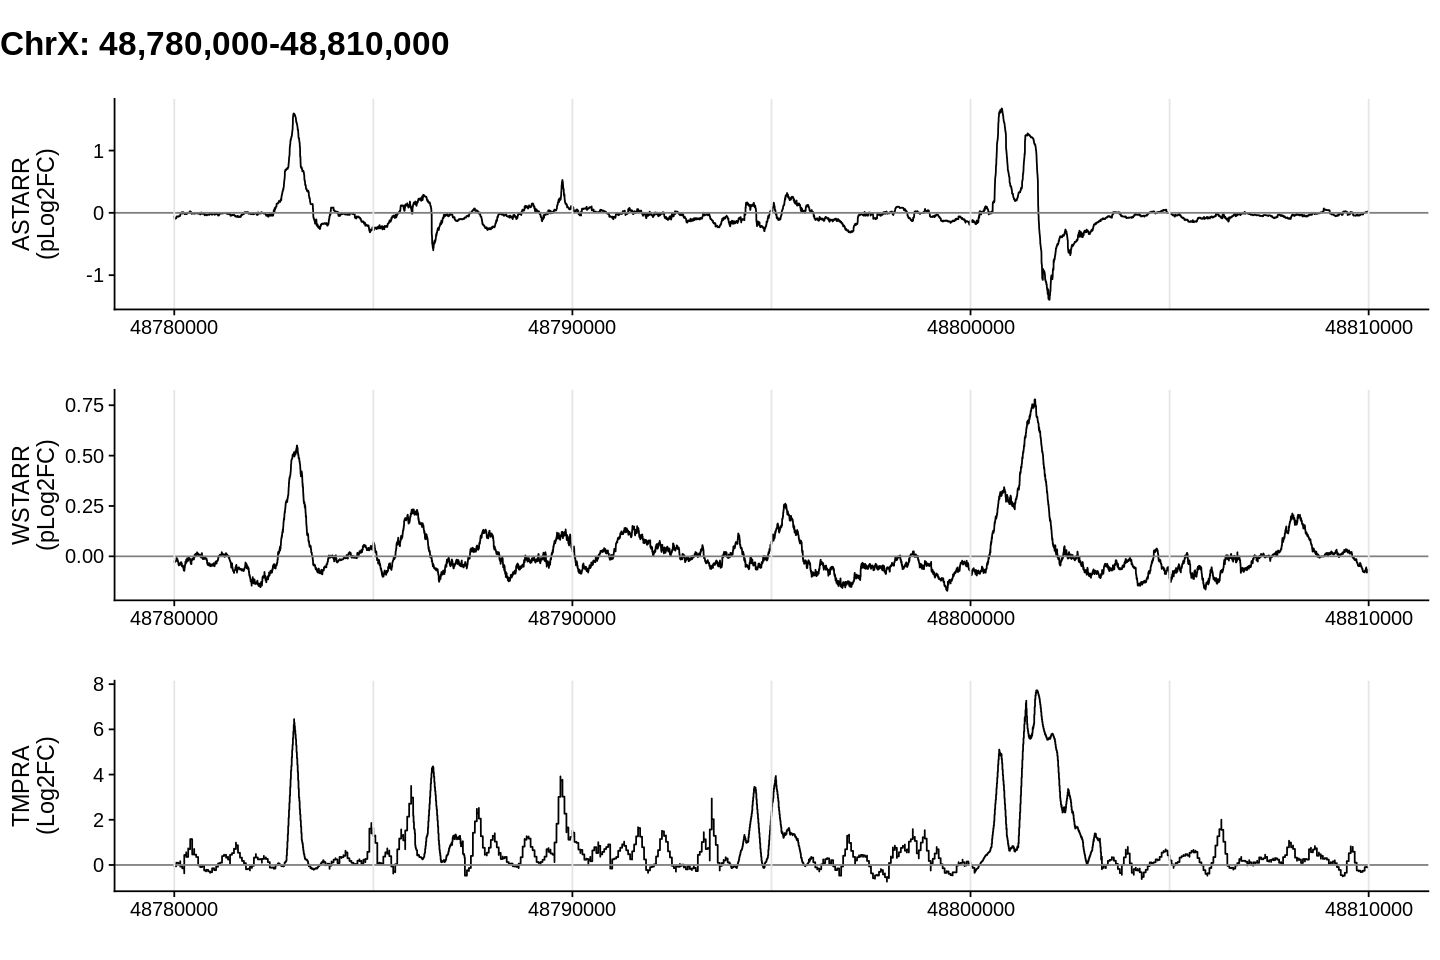

In [29]:
options(repr.plot.height=8, repr.plot.width=12)
plot_grid(
  plt_title, 
  plt_track,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)